In [33]:
import numpy as np
import torch
from torchvision.datasets import mnist # 导入 pytorch 内置的 mnist 数据
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def data_tf(x):
    x = np.array(x, dtype='float32') / 255
    x = (x - 0.5) / 0.5 # 标准化，这个技巧之后会讲到
    x = x.reshape((-1,)) # 拉平
    x = torch.from_numpy(x)
    return x

train_set = mnist.MNIST('./data', train=True, transform=data_tf, download=True) # 重新载入数据集，申明定义的数据变换
test_set = mnist.MNIST('./data', train=False, transform=data_tf, download=True)

# 使用 pytorch 自带的 DataLoader 定义一个数据迭代器
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
test_data = DataLoader(test_set, batch_size=128, shuffle=False)

In [35]:
# 使用 Sequential 定义 4 层神经网络
net = nn.Sequential(
    nn.Linear(784, 1000),
    nn.ReLU(),
    nn.Linear(1000, 1000),
    nn.ReLU(),
    nn.Linear(1000, 400),
    nn.ReLU(),
    nn.Linear(400, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)
# 定义 loss 函数
criterion = nn.CrossEntropyLoss()#交叉熵
optimizer = torch.optim.SGD(net.parameters(), 1e-2) # 使用随机梯度下降，学习率 0.1

In [36]:
# 开始训练
losses = []
acces = []
eval_losses = []
eval_acces = []

for e in range(20):
    train_loss = 0
    train_acc = 0
    net.train()   #在前向训练的过程中指定当前模型是训练还是在验证。
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im) #输出out是一个概率组，十个输出的
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.item()
        # 计算分类的准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))
    # 在测试集上检验效果

    eval_loss = 0
    eval_acc = 0
    net.eval() # 将模型改为预测模式,对应net.train() 
    for im, label in test_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        # 记录误差
        eval_loss += loss.item()
        # 记录准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc
        
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(e, train_loss / len(train_data), train_acc / len(train_data), 
                     eval_loss / len(test_data), eval_acc / len(test_data)))

epoch: 0, Train Loss: 1.786372, Train Acc: 0.442547, Eval Loss: 0.705819, Eval Acc: 0.782140
epoch: 1, Train Loss: 0.512272, Train Acc: 0.842168, Eval Loss: 0.381008, Eval Acc: 0.885779
epoch: 2, Train Loss: 0.355183, Train Acc: 0.895472, Eval Loss: 0.306901, Eval Acc: 0.910107
epoch: 3, Train Loss: 0.291964, Train Acc: 0.913713, Eval Loss: 0.266338, Eval Acc: 0.919205
epoch: 4, Train Loss: 0.246575, Train Acc: 0.926589, Eval Loss: 0.243215, Eval Acc: 0.925930
epoch: 5, Train Loss: 0.210051, Train Acc: 0.937683, Eval Loss: 0.197680, Eval Acc: 0.940566
epoch: 6, Train Loss: 0.179905, Train Acc: 0.947012, Eval Loss: 0.170005, Eval Acc: 0.949862
epoch: 7, Train Loss: 0.155863, Train Acc: 0.953775, Eval Loss: 0.160797, Eval Acc: 0.952136
epoch: 8, Train Loss: 0.138767, Train Acc: 0.958872, Eval Loss: 0.132273, Eval Acc: 0.959949
epoch: 9, Train Loss: 0.123628, Train Acc: 0.963586, Eval Loss: 0.129212, Eval Acc: 0.959256
epoch: 10, Train Loss: 0.110491, Train Acc: 0.967667, Eval Loss: 0.128

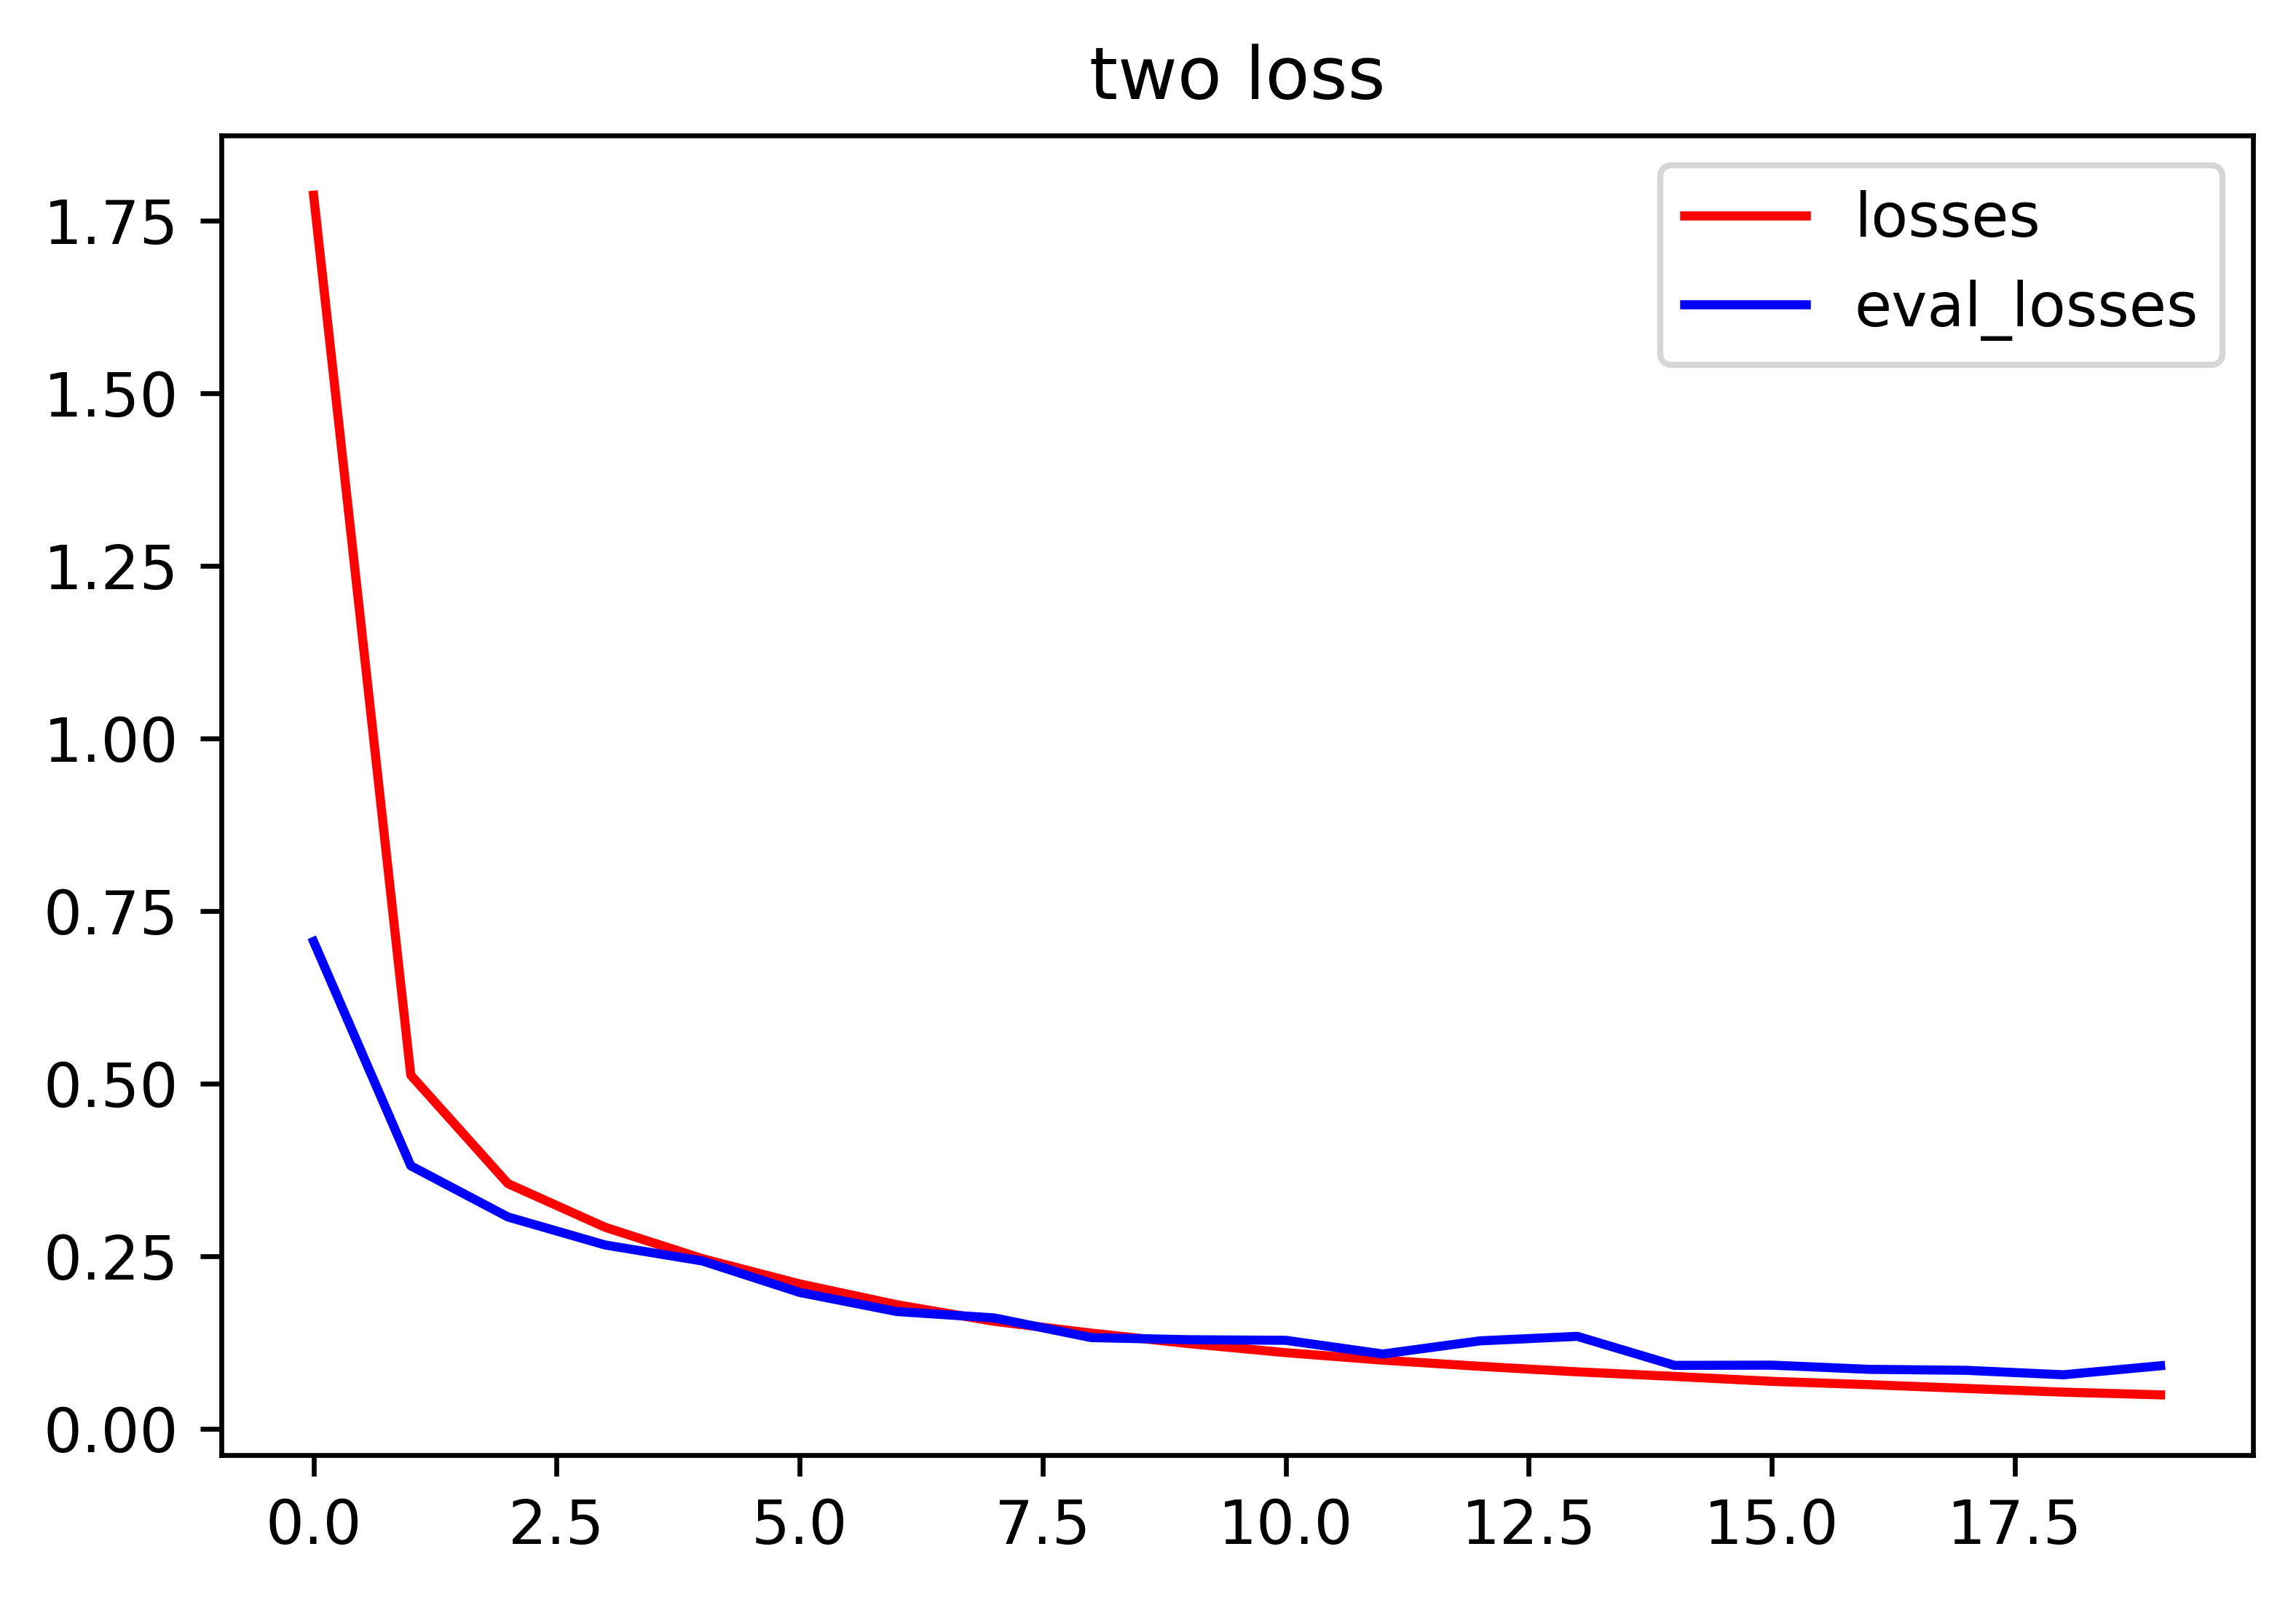

In [37]:
plt.figure(dpi = 600)
plt.plot(np.arange(len(losses)), losses,'r',label='losses')
plt.plot(np.arange(len(eval_losses)), eval_losses,'b',label='eval_losses')
plt.title('two loss')
#plt.show()
plt.savefig('two_loss.jpg',dpi=600)
plt.legend(loc='best')

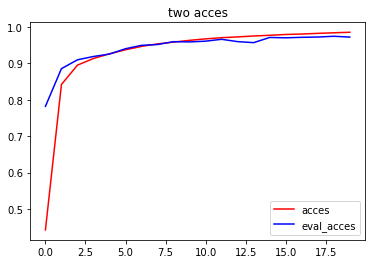

In [38]:
plt.figure(dpi = 600)
plt.plot(np.arange(len(acces)), acces,'r',label='acces')
plt.plot(np.arange(len(eval_acces)), eval_acces,'b',label='eval_acces')
plt.title('two acces')
#plt.show()
plt.savefig('two_acces.jpg',dpi=600)
plt.legend(loc='best')